# Lab 8: Define and Solve an ML Problem of Your Choosing

In [35]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [36]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv('data/bookReviewsData.csv')

print(df.shape)
print(list(df.columns))
df.head(10)

(1973, 2)
['Review', 'Positive Review']


,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True
5,I don't know why it won the National Book Awar...,False
6,The daughter of a prominent Boston doctor is d...,False
7,I was very disapointed in the book.Basicly the...,False
8,I think in retrospect I wasted my time on this...,False
9,I have a hard time understanding what it is th...,False


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
I chose the book reviews data set. 
3. What will you be predicting? What is the label?
I will be predicting whether the review is positive or not. The label is the positive review column. 

5. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
This is a supervised learning problem, since we have seen and labeled data. This would be a classification problem, and it would be a binary classification problem. It is classification because we have two possible output values: Positive(True) or Negative(False). 
7. What are your features? (note: this list may change after your explore your data)
The text reviews are the features. Since raw text cannot be directly processed by machine learning models, I will preprocess the text (e.g., lowercasing, removing punctuation and stopwords) and then convert it into numerical form using TF-IDF vectorization, so it can be used effectively in a classification model.
9. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?
This is an important problem because companies (like bookstores or publishers) can use sentiment classification to automatically moderate, filter, and understand customer feedback. Not only can it help businesses, but it can help readers discover and engage with books. It can help with:

- Enhancing User Experience: Helping users quickly find books they'll enjoy, increasing satisfaction and platform loyalty.

- Boosting Discoverability and Sales: Recommending relevant books and surface hidden gems, supporting increased exposure and purchases.

- Enabling Targeted Marketing: Informing publishers and marketers on which books resonate with specific audiences, improving campaign efficiency.

- Simplifying Book Discovery: Cutting through information overload by offering personalized suggestions, book selection can be easier for readers.

- Building a Community: Fostering engagement through shared interests, discussions, and review-based interactions, enriching the reading ecosystem.

This sentiment analysis can create value for both businesses and users by improving the overall digital reading experience.

<Double click this Markdown cell to make it editable, and record your answers here.>

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

This is an NLP problem, so I will have to preprocess and vectorize the text. I am going to clean and prepare the text by doing:

- Handle missing values, and drop columns if there are missing values 
- Clean the text (NLP Specific)
    - Convert all text to lowercase
    - Remove punctuation and special characters
    - Remove stopwords
    - Apply lemmatization or stemming for normalization
To do this, I will use TF-IDF. I will manually apply lemmatization/stemming. 

- I will check to see if there is a class imbalance, so there aren't more positive reviews than negative and vice versa.

- Visualizations: I plan to generate a word cloud to show the most common words in the dataset and better understand the review content.


2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?

- I will be using logistic regression since this is a binary classification problem, and also Random Forest to make comparisons.
- I will not need to scale my data because TF-IDF produces scaled data.
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?

- Accuracy: Overall correctness of the model

- Precision: How many predicted positives were actually positive

- Recall: How many actual positives were correctly predicted

- F1 Score: The harmonic mean of the precision and recall, helps to see if there is a class imbalance. 

- Confusion Matrix: To visualize true vs. predicted classes

- ROC-AUC Score: To evaluate the model’s ability to distinguish between the two classes

- Grid Search:  I will tune the regularization strength to improve how well the model generalizes. 


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [37]:
df.info() #displaying the dataframes info and datatypes
df.describe()
df.dtypes


#Below, we see that the dataset contains 1,973 text reviews with no missing values. The Review column is textual, and the Positive Review is a boolean label which is necessary for binary classification. There are 1,865 unique reviews, with some duplication. The labels are fairly balanced, with the most common label (False) appearing 993 times.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB


Review             object
Positive Review      bool
dtype: object

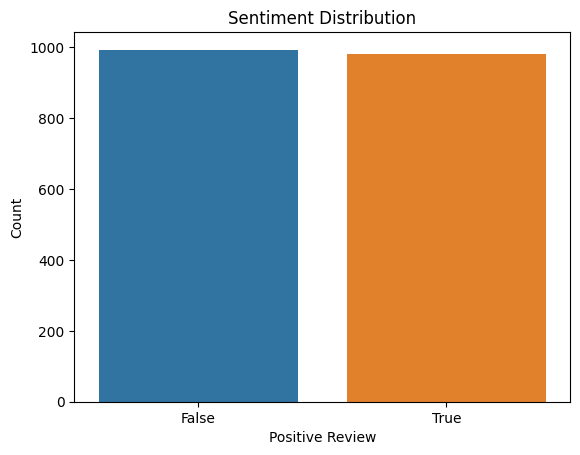

In [38]:
df['Positive Review'].value_counts()

sns.countplot(data=df, x='Positive Review')
plt.title("Sentiment Distribution")
plt.xlabel("Positive Review")
plt.ylabel("Count")
plt.show()

#This dataset is very well balanced, it is almost 50/50. You can see this in the graph below.
#I do not need to use Matplotlib or Seaborn to to detect outliers and visualize relationships between features and labels since I will be using TF-IDF because my features are text.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data?
I do not have a new feature list. The review column will stay as the feature, and the positive review column will stay as the label. 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
As previously stated, this is an NLP problem. I have to clean the text by:
  - Converting all text to lowercase
  - Removing punctuation and special characters
  - Removing stopwords
  - Applying lemmatization or stemming for normalization (manually)
To clean and vectorize the text, I will use TF-IDF. Finally, I'll split the dataset into testing and training sets to evaluate the models generalization. Also, I will generate a word cloud just so users can see the most frequent terms in the reviews.
* What is your model (or models)?
I will use Logistic Regression since this is a binary classification problem, and LR is well-suited for TF-IDF features. 
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data.

I will train the model on the TF-IDF-transformed training data. I will evaluate performance using metrics we’ve covered: accuracy, precision, recall, F1 score and a confusion matrix. These metrics will help assess how well the model identifies positive and negative reviews. Also, I will plot the ROC-AUC curve and compute the ROC-AUC score to evaluate the model’s ability to separate the two classes across different thresholds. All of these metrics work well for a binary classification problem. Lastly, I will use GridSearchCV to tune hyperparameters like the regularization strength (C) in logistic regression. I will also implement a Random Forest model, and evaluate the same metrics as logistic regression. I will compare and see which model works better for the data!

<Double click this Markdown cell to make it editable, and record your answers here.>

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [39]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [40]:
# creating labeled examples from the dataset
y = df['Positive Review']
X = df['Review']

#Create the training and testing set. For binary classification, there is usually an 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

416     Boring, tasteless and unoriginal. Photographer...
628     The book starts off ok with a good introductio...
332     One at the front: The really own words of the ...
1338    Ever since starting on the SIMPLE ABUNDANCE jo...
874     This book was written in 1982, updated in 1995...
Name: Review, dtype: object

In [41]:
# 1. Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 2),
    lowercase = True,
    max_features = 5000 #to reduce noise, as there is a lot of data
)

#I chose these 

# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train)

# 3. Print the first 50 items in the vocabulary
print("Vocabulary size {0}: ".format(len(tfidf_vectorizer.vocabulary_)))
print(str(list(tfidf_vectorizer.vocabulary_.items())[0:50])+'\n')

      
# 4. Transform *both* the training and test data using the fitted vectorizer and its 'transform' attribute
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# 5. Print the matrix
print(X_train_tfidf.todense())


#These Kaggle data sets helepd me, but I ended up not using NLTK
#https://www.kaggle.com/discussions/getting-started/251213
#https://www.kaggle.com/code/rawaaelghali/real-or-not-nlp-with-disaster-tweets#Step-1:-Punctuation

Vocabulary size 5000: 
[('boring', 639), ('unoriginal', 4718), ('photographer', 3330), ('obvious', 3133), ('kept', 2537), ('paying', 3281), ('attention', 338), ('cases', 762), ('contrast', 1051), ('tone', 4585), ('line', 2671), ('star', 4254), ('big', 461), ('know', 2555), ('real', 3685), ('model', 2962), ('sure', 4392), ('book', 510), ('merits', 2906), ('aren', 279), ('artistic', 304), ('putting', 3595), ('copy', 1077), ('sale', 3941), ('sure book', 4393), ('starts', 4263), ('ok', 3151), ('good', 2014), ('introduction', 2427), ('various', 4752), ('reading', 3677), ('chapter', 807), ('programming', 3532), ('linux', 2677), ('audio', 345), ('fails', 1721), ('terribly', 4493), ('information', 2370), ('just', 2513), ('plain', 3360), ('wrong', 4970), ('function', 1928), ('used', 4730), ('open', 3165), ('file', 1806), ('use', 4727), ('author', 351), ('uses', 4737), ('version', 4767), ('start', 4258)]

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.   

AUC on the test data: 0.9055
The size of the feature space: 5000
Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('boring', 639), ('unoriginal', 4718), ('photographer', 3330), ('obvious', 3133), ('kept', 2537)]:


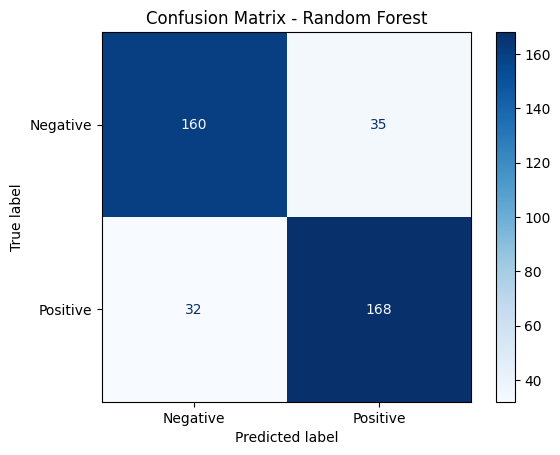


Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.82      0.83       195
        True       0.83      0.84      0.83       200

    accuracy                           0.83       395
   macro avg       0.83      0.83      0.83       395
weighted avg       0.83      0.83      0.83       395



In [42]:
#Now I will fit a logistic regression model to the transformed data, and evaluate it. 
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# 2. Make predictions on the transformed test data using the predict_proba() method and 
# save the values of the second column
probability_predictions = model.predict_proba(X_test_tfidf)[:,1]

# 3. Make predictions on the transformed test data using the predict() method 
class_label_predictions = model.predict(X_test_tfidf)

# 4. Compute the Area Under the ROC curve (AUC) for the test data. Note that this time we are using one 
# function 'roc_auc_score()' to compute the auc rather than using both 'roc_curve()' and 'auc()' as we have 
# done in the past
auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

# 5. Print out the size of the resulting feature space using the 'vocabulary_' attribute of the vectorizer
len_feature_space = len(tfidf_vectorizer.vocabulary_)
print('The size of the feature space: {0}'.format(len_feature_space))

# 6. Get a glimpse of the features:
first_five = list(tfidf_vectorizer.vocabulary_.items())[0:5]
print('Glimpse of first 5 entries of the mapping of a word to its column/feature index \n{}:'.format(first_five))

#printing the confusion matrix
cm = confusion_matrix(y_test, class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
print("\nClassification Report:\n", classification_report(y_test, class_label_predictions))

#https://www.geeksforgeeks.org/machine-learning/how-to-plot-confusion-matrix-with-labels-in-sklearn/ used this for plotting the confusion matrix.


Computing ROC Curve...
End
Plotting ROC Curve...


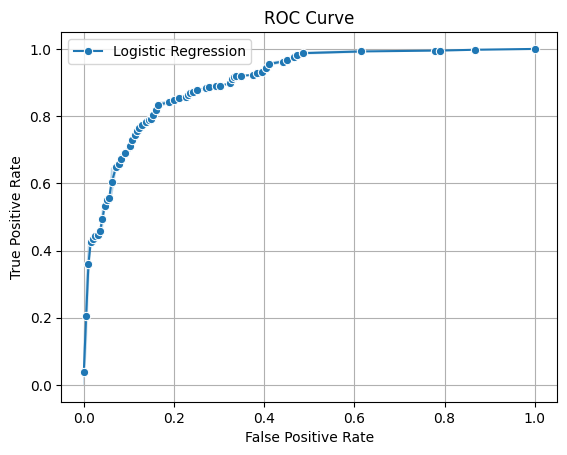

In [43]:
#ROC 
print('Computing ROC Curve...')
fpr, tpr, thresholds = roc_curve(y_test, probability_predictions)
print('End')

# Plot ROC Curve
print('Plotting ROC Curve...')
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=fpr, y=tpr, marker='o')

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(['Logistic Regression'])
plt.grid(True)
plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV

print('Running Grid Search...')
model = LogisticRegression(max_iter=500, solver='liblinear')  # 'liblinear' works with L2 penalty for binary
param_grid = {'C': list(np.linspace(0.01, 10.0, 10))}
grid = GridSearchCV(model, param_grid, cv=5, scoring='f1')  # f1 since it's binary classification
grid_search = grid.fit(X_train_tfidf, y_train)
print('Done')

best_c = grid.best_params_['C']
print("Best C value:", best_c)

Running Grid Search...
Done
Best C value: 2.23


# Random Forest Implementation

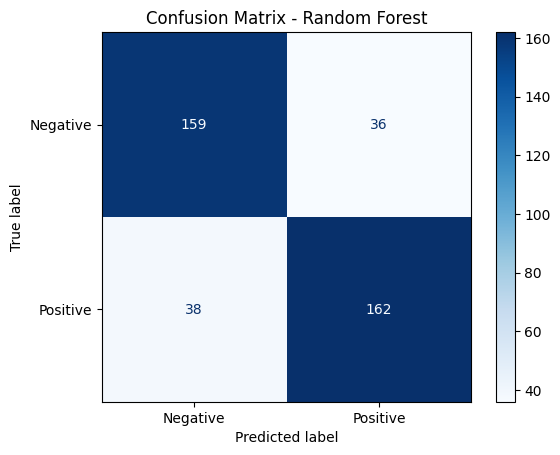


Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.82      0.81       195
        True       0.82      0.81      0.81       200

    accuracy                           0.81       395
   macro avg       0.81      0.81      0.81       395
weighted avg       0.81      0.81      0.81       395

AUC Score: 0.8858


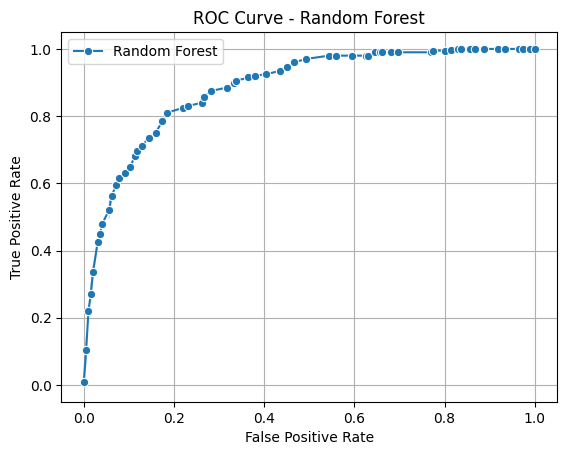

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# 2. Make predictions
rf_probs = rf_model.predict_proba(X_test_tfidf)[:, 1]
rf_preds = rf_model.predict(X_test_tfidf)

# 3. Evaluate the model
cm = confusion_matrix(y_test, rf_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()
print("\nClassification Report:\n", classification_report(y_test, rf_preds))

# 4. ROC-AUC Score
rf_auc = roc_auc_score(y_test, rf_probs)
print("AUC Score: {:.4f}".format(rf_auc))

# 5. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

# Plot ROC Curve
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=fpr, y=tpr, marker='o')

plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(['Random Forest'])
plt.grid(True)
plt.show()

# Final Summary
In this project, I built a binary text classification model to predict whether a book review is positive or not using the bookReviewsData dataset. I used TF-IDF to transform text into numerical features and trained Logistic Regression and Random Forest models. After evaluating with accuracy, precision, recall, F1 score, and ROC-AUC, I found that Logistic Regression slightly outperformed Random Forest and was easier to interpret. Therefore, I selected it as my final model. This project highlighted the importance of proper text preprocessing and evaluation in NLP tasks.